<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

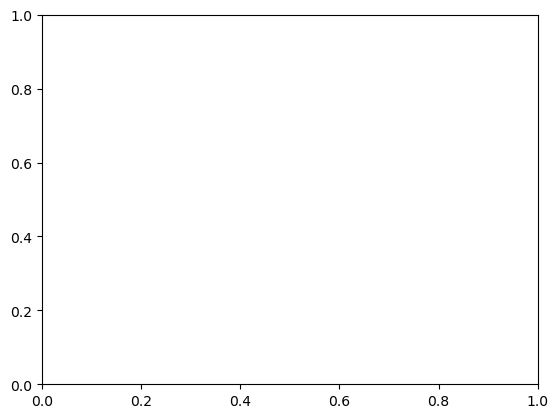

In [37]:
pd.options.display.float_format = '{:.2f}'.format


Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [33]:
df.head()
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.00,10589.00,10582.00,11276.00,8972.00,11111.00
mean,12490.39,757047.73,131596.73,42.06,4.78,30.78
std,7235.46,9705598.50,294786.52,24.67,4.57,7.39
min,4.00,0.00,0.00,3.00,0.00,16.00
25%,6264.25,25000.00,26868.00,40.00,2.00,25.00
50%,12484.00,65000.00,57745.00,40.00,4.00,29.00
75%,18784.75,120000.00,100000.00,43.00,5.00,35.00
max,25142.00,700000000.00,2000000.00,1012.00,99.00,99.00


(0.0, 2252443.1809674148)

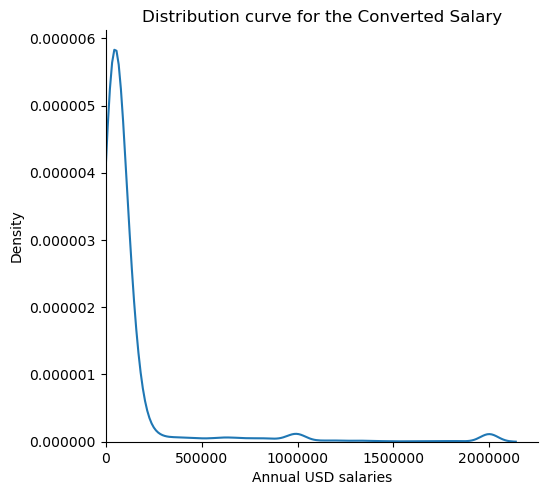

In [63]:
# your code goes here
sns.displot(df, x="ConvertedComp", kind="kde")
plt.ticklabel_format(style='plain', axis='both')
plt.title('Distribution curve for the Converted Salary')
plt.xlabel('Annual USD salaries')
plt.xlim(0,)

Plot the histogram for the column `ConvertedComp`.


Text(0, 0.5, 'Count')

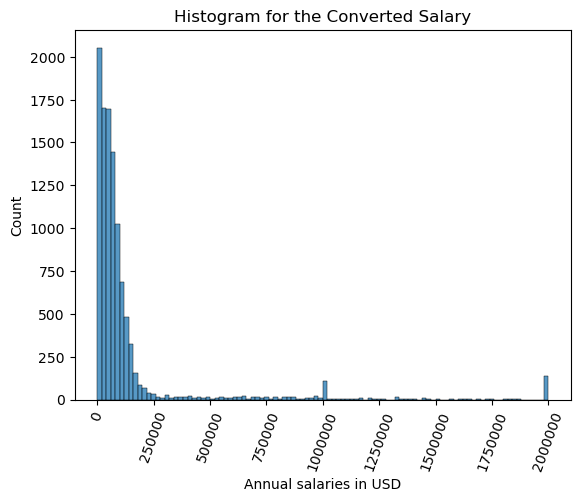

In [167]:
# your code goes here
sns.histplot(df, x="ConvertedComp", bins=100)
plt.ticklabel_format(style='plain', axis='both')
plt.xticks(rotation=70)
plt.title('Histogram for the Converted Salary')
plt.xlabel('Annual salaries in USD')
plt.ylabel('Count')

What is the median of the column `ConvertedComp`?


In [77]:
# your code goes here
print("median of the column ConvertedComp: {} USD".format(df['ConvertedComp'].median()))

median of the column ConvertedComp: 57745.0 USD


How many responders identified themselves only as a **Man**?


In [117]:
# your code goes here
men = df[df['Gender'] == 'Man']['Gender'].value_counts().to_list()[0]
print("Responders that identified themselves only as a Man {}"
      .format(men))

Responders that identified themselves only as a Man 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [131]:
# your code goes here
med_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median Salary for responders identified themselves only as a Woman - {} USD.".format(med_woman))

Median Salary for responders identified themselves only as a Woman - 57708.0 USD.


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Min for Age column - 16.0 years
25 percentile for Age column - 25.0 years
Median for Age column - 29.0 years
75 percentile for Age column - 35.0 years
Max for Age column - 99.0 years


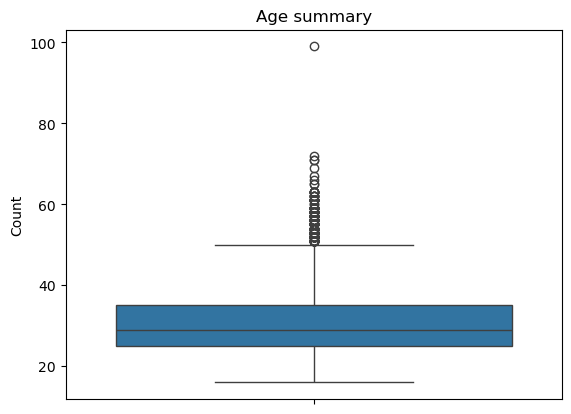

In [151]:
# your code goes here
sns.boxplot(data=df, y='Age')
plt.title('Age summary')
plt.xlabel('')
plt.ylabel('Count')

print(f"Min for Age column - {df['Age'].min()} years")
print(f"25 percentile for Age column - {df['Age'].quantile(q=0.25)} years")
print(f"Median for Age column - {df['Age'].median()} years")
print(f"75 percentile for Age column - {df['Age'].quantile(q=0.75)} years")
print(f"Max for Age column - {df['Age'].max()} years")

Plot a histogram of the column `Age`.


Text(0, 0.5, 'Count')

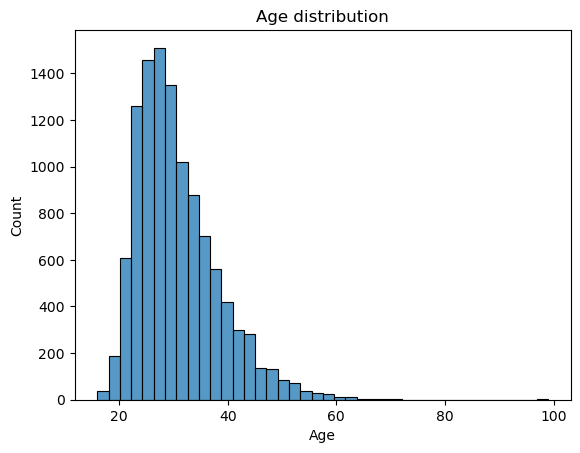

In [169]:
# your code goes here
sns.histplot(df, x='Age', bins=40)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0, 0.5, 'Count')

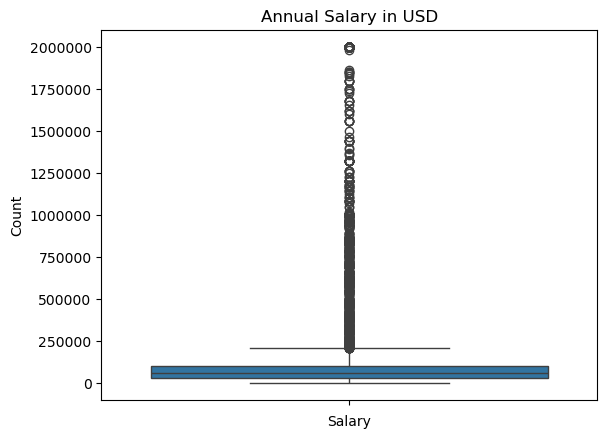

In [175]:
# your code goes here
sns.boxplot(data=df, y='ConvertedComp')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Annual Salary in USD')
plt.xlabel('Salary')
plt.ylabel('Count')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [187]:
# your code goes here
quant_25 = df['ConvertedComp'].quantile(q=0.25)
quant_75 = df['ConvertedComp'].quantile(q=0.75)
quant_range = quant_75 - quant_25

print(f"25 percentile for ConvertedComp column - {quant_25} USD")
print(f"75 percentile for ConvertedComp column - {quant_75} USD")
print(f"Inter Quartile Range for ConvertedComp column - {quant_range} USD")

25 percentile for ConvertedComp column - 26868.0 USD
75 percentile for ConvertedComp column - 100000.0 USD
Inter Quartile Range for ConvertedComp column - 73132.0 USD


Find out the upper and lower bounds.


In [191]:
# your code goes here
up_bound =  quant_75 + quant_range * 1.5
low_bound =  quant_25 - quant_range * 1.5

print(f"Upper bound for ConvertedComp column - {up_bound} USD")
print(f"Lower bound for ConvertedComp column - {low_bound} USD")

Upper bound for ConvertedComp column - 209698.0 USD
Lower bound for ConvertedComp column - -82830.0 USD


Identify how many outliers are there in the `ConvertedComp` column.


In [203]:
df[df['ConvertedComp'] < low_bound]['ConvertedComp'].count()

0

In [217]:
# your code goes here
in_bound = (df['ConvertedComp'] <= up_bound) & (df['ConvertedComp'] >= low_bound)

outliers = df[~in_bound]['ConvertedComp'].count()
print(f"Number of outliers in ConvertedComp column - {outliers}")

Number of outliers in ConvertedComp column - 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [226]:
# your code goes here
df1 = df[in_bound]
df1.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.00,9703.00,9703.00,9664.00,7612.00,9493.00
mean,12501.01,724113.93,59883.21,41.86,4.74,30.70
std,7235.63,7186805.88,43394.34,24.61,4.42,7.35
min,4.00,0.00,0.00,3.00,0.00,16.00
25%,6237.00,20000.00,24060.00,40.00,2.00,25.00
50%,12571.00,63000.00,52704.00,40.00,4.00,29.00
75%,18787.50,115000.00,85574.50,42.00,5.00,34.00
max,25141.00,390000000.00,209356.00,1012.00,99.00,99.00


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [235]:
# your code goes here
df.corr(method='pearson', numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.00,-0.01,0.00,-0.02,0.00,0.00
CompTotal,-0.01,1.00,0.00,0.00,0.01,0.01
ConvertedComp,0.00,0.00,1.00,0.02,-0.03,0.11
WorkWeekHrs,-0.02,0.00,0.02,1.00,0.03,0.04
CodeRevHrs,0.00,0.01,-0.03,0.03,1.00,-0.02
Age,0.00,0.01,0.11,0.04,-0.02,1.00


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
